Open the dataset `house_prices.csv` with the following  command:

In [1]:
import os

os.makedirs("../../datasets", exist_ok=True)

In [2]:
%%bash

wget -qO "../../datasets/house_prices.csv" "https://github.com/INRIA/scikit-learn-mooc/raw/master/datasets/house_prices.csv"

In [3]:
import pandas as pd

ames_housing = pd.read_csv("../../datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


`ames_housing` is a pandas dataframe. The column "SalePrice" contains the target variable. Note that we instructed pandas to treat the character "?" as a marker for cells with missing values also known as "null" values.

To simplify this exercise, we will only used the numerical features defined below:

In [4]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", 
    "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BedroomAbvGr", 
    "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", 
    "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]
data_numerical.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,2,548,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,1,2,460,298,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,1,2,608,0,42,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,3,642,0,35,272,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,3,836,192,84,0,0,0,0,0


We can display an interactive diagram with the following command:

In [5]:
from sklearn import set_config
set_config(display='diagram')

We will compare the statistical performance of a decision tree and a linear regression. For this purpose, we will create two separate predictive models and evaluate them by 10-fold cross-validation.

Thus, use `sklearn.linear_model.LinearRegression` and `sklearn.tree.DecisionTreeRegressor` to create the model. Use the default parameters for both models.

**Note**: missing values should be handle with a scikit-learn `sklearn.impute.SimpleImputer` and the default strategy ("`mean`"). Be also aware that a linear model requires to scale the data. You can use a `sklearn.preprocessing.StandardScaler`.

The code to get an estimate of the statistical performance of a linear regression is shown below:

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

linear_regression = make_pipeline(StandardScaler(), SimpleImputer(strategy='mean'), 
    LinearRegression())
linear_regression

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [7]:
%%time
from sklearn.model_selection import cross_validate

cv_results_linear_regression = cross_validate(
    linear_regression, data_numerical, target, 
    cv=10, scoring='r2', return_estimator=True, n_jobs=2)
print(f"Average R2 score of linear regression:\n"
    f"{cv_results_linear_regression['test_score'].mean():.3f} +/- "
    f"{cv_results_linear_regression['test_score'].std():.3f}")

Average R2 score of linear regression:
0.721 +/- 0.134
CPU times: user 36 ms, sys: 27.4 ms, total: 63.4 ms
Wall time: 771 ms


We need to preprocess the data with a `StandardScaler` and a `SimpleImputer` to scale and impute the missing value before to train the linear regressor. The statistical performance obtained are ~0.72 in terms of $R^2$ score.

When dealing with decision tree, it is unnecessary to scale the data. So only the `SimpleImputer` is required in the preprocessing steps. The code below shows how to evaluate a decision tree regressor on our regression problem.

In [8]:
from sklearn.tree import DecisionTreeRegressor

tree = make_pipeline(SimpleImputer(strategy='mean'), 
    DecisionTreeRegressor(random_state=0))
tree

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=0))])

In [9]:
%%time
cv_results_tree = cross_validate(tree, data_numerical, target, cv=10,
    scoring='r2', n_jobs=2)
print(f"Average R2 score of decision tree regression:\n"
    f"{cv_results_tree['test_score'].mean():.3f} +/- "
    f"{cv_results_tree['test_score'].std():.3f}")

Average R2 score of decision tree regression:
0.622 +/- 0.074
CPU times: user 20.1 ms, sys: 729 µs, total: 20.8 ms
Wall time: 141 ms


The average $R^2$ score during cross-validation is ~0.62.

Instead of using the default parameter for decision tree regressor, we will optimize the depth of the tree. Using a grid-search (`sklearn.model_selection.GridSearchCV`) with a 10-fold cross-validation, vary the `max_depth` from 1 level up to 15 levels.

In general, `get_params()` returns a dict whose keys are the parameter names.

In [10]:
tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'decisiontreeregressor', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'decisiontreeregressor__ccp_alpha', 'decisiontreeregressor__criterion', 'decisiontreeregressor__max_depth', 'decisiontreeregressor__max_features', 'decisiontreeregressor__max_leaf_nodes', 'decisiontreeregressor__min_impurity_decrease', 'decisiontreeregressor__min_impurity_split', 'decisiontreeregressor__min_samples_leaf', 'decisiontreeregressor__min_samples_split', 'decisiontreeregressor__min_weight_fraction_leaf', 'decisiontreeregressor__random_state', 'decisiontreeregressor__splitter'])

We need to use a `GridSearchCV` and pass a `DecisionTreeRegressor`. In addition, we should pass an array with the different values of `max_depth` to evaluate.

In [11]:
import numpy as np
from sklearn.model_selection import GridSearchCV

params = {"decisiontreeregressor__max_depth": np.arange(1, 15)}
search = GridSearchCV(tree, param_grid=params, cv=10)
search

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=0))]),
             param_grid={'decisiontreeregressor__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [12]:
%%time
cv_results_tree_optimal_depth = cross_validate(
    search, data_numerical, target, cv=10, 
    scoring='r2', return_estimator=True, n_jobs=2)
print(f"Average R2 score of optimal decision tree regression:\n"
    f"{cv_results_tree_optimal_depth['test_score'].mean():.3f} +/- "
    f"{cv_results_tree_optimal_depth['test_score'].std():.3f}")

Average R2 score of optimal decision tree regression:
0.698 +/- 0.051
CPU times: user 45.7 ms, sys: 4.55 ms, total: 50.2 ms
Wall time: 8.93 s


The results obtained are around ~0.7 in terms of $R^2$ score. We can inspect the trees trained during the cross-validation to find what was the values of the `max_depth` parameter.

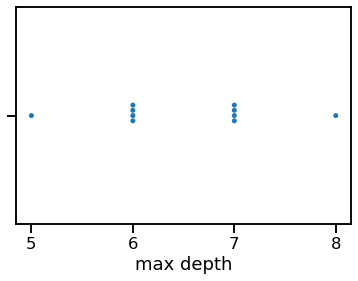

In [13]:
import seaborn as sns
sns.set_context("talk")

max_depth = [estimator.best_params_['decisiontreeregressor__max_depth']
    for estimator in cv_results_tree_optimal_depth['estimator']]
max_depth = pd.Series(max_depth, name='max depth')
_ = sns.swarmplot(x=max_depth)

Most of the time `max_depth` was in the range 5 to 8.

From the result above, optimized decision tree gives an $R^2$ of ~0.7 in average while the linear regression gives an average of ~0.72.

Instead of using only the numerical dataset (which was the variable `data_numerical`), use the entire dataset available in the variable `data`.

Create a preprocessor by dealing separately with the numerical and categorical columns. For the sake of simplicity, we will define the categorical columns as the columns with an `object` data type.

**Do not optimize the `max_depth` parameter.**

The code to create the predictive model to handle both categorical and numerical columns is the following:

In [14]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OrdinalEncoder

numerical_processor = SimpleImputer(strategy='mean')
categorical_processor = make_pipeline(
    SimpleImputer(strategy='most_frequent', fill_value='missing'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)
preprocessor = make_column_transformer(
    (numerical_processor, selector(dtype_exclude=object)),
    (categorical_processor, selector(dtype_include=object))
)
tree = make_pipeline(preprocessor, 
    DecisionTreeRegressor(random_state=0))
tree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f591f6f0550>),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f591f6e24c0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=0))])

Then, we can evaluate this tree using cross-validatation:

In [15]:
%%time
cv_results = cross_validate(tree, data, target, cv=10, 
    scoring='r2', return_estimator=True, n_jobs=2)
print(f"Average R2 score of decision tree regression:\n"
    f"{cv_results['test_score'].mean():.3f} +/- "
    f"{cv_results['test_score'].std():.3f}")

Average R2 score of decision tree regression:
0.750 +/- 0.088
CPU times: user 85 ms, sys: 505 µs, total: 85.5 ms
Wall time: 404 ms


The score obtained is ~0.75 for the performance in terms of $R^2$ better by incorporating the categorical features in comparison with the previous tree with optimal depth.